In [15]:
import requests
from bs4 import BeautifulSoup
import pickle
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.community import greedy_modularity_communities

# # 设置公交线路的URL
# url = 'https://moovitapp.com/index/en-gb/public_transportation-line-2-Canberra-783-8854-235185-0'
# 
# # 发送HTTP请求获取网页内容
# response = requests.get(url)
# response.raise_for_status()  # 确保请求成功
# 
# # 使用BeautifulSoup解析HTML
# soup = BeautifulSoup(response.text, 'html.parser')
# 
# # 查找存有站点名称的HTML元素
# stops_list = soup.find('ul', class_='stops-list')
# stop_containers = stops_list.find_all('li', class_='stop-container') if stops_list else []
# 
# # 提取站点名称
# station_names = [stop.find('h3').get_text(strip=True) for stop in stop_containers if stop.find('h3')]
# 
# print(station_names)


In [2]:
import requests
from bs4 import BeautifulSoup

def fetch_station_names(url):
    # 发送HTTP请求获取网页内容
    response = requests.get(url)
    response.raise_for_status()  # 确保请求成功

    # 使用BeautifulSoup解析HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # 查找存有站点名称的HTML元素
    stops_list = soup.find('ul', class_='stops-list')
    stop_containers = stops_list.find_all('li', class_='stop-container') if stops_list else []

    # 提取站点名称
    return [stop.find('h3').get_text(strip=True) for stop in stop_containers if stop.find('h3')]

def fetch_all_routes(base_url, overview_page):
    # 获取所有线路的总览页面
    response = requests.get(overview_page)
    response.raise_for_status()

    # 解析页面
    soup = BeautifulSoup(response.text, 'html.parser')
    line_items = soup.find_all('li', class_='line-item line-data mobile-line')

    # 创建一个字典来保存所有路线的站点信息
    routes_dict = {}

    # 遍历每条线路
    for line_item in line_items:
        line_link = line_item.find('a')['href']
        line_number = line_item.find('span', class_='text').text

        # 抓取该线路的站点信息
        stations = fetch_station_names(line_link)
        routes_dict[line_number] = stations

    return routes_dict

# 主程序入口
base_url = 'https://moovitapp.com'
overview_page = 'https://moovitapp.com/index/en-gb/public_transportation-lines-Canberra-783-8854'
routes_info = fetch_all_routes(base_url, overview_page)

print(routes_info)


{'2': ['Fyshwick Park & Ride Iron Knob St', 'Canberra Outlet Centre Iron Knob St', 'Canberra Av Before Faulding St', 'Canberra Av Opp Geelong St', 'Canberra Av After Monaro Hwy', 'Canberra Av After Nyrang St', 'Wentworth Av Opp Canberra Railway Stn', 'Wentworth Av Before Dawes St', 'Wentworth Av Opp Old Bus Depot Markets', 'Australian Federal Police College Brisbane Av', 'Barton Bus Stn Plt 1', 'Parkes Pl Opp John Gorton Building', 'The Treasury Building King Edward Tce', 'Commonwealth Av Opp Regatta Point', 'Legislative Assembly London Cct', 'City Interchange Plt 1', 'Marcus Clarke St Before Rimmer St', 'Anu Barry Dr', 'Haydon Dr Opp North Canberra Hospital', 'Haydon Dr Opp Cit Bruce', 'Radford College College St', 'College St Opp University Of Canberra', 'College St Opp Cisac', 'Eastern Valley Way Bus Stn', 'Belconnen Interchange Plt 4', 'Westfield Belconnen Plt 2', 'Cohen St Interchange Plt 6', 'Southern Cross Dr Before Chewings St', 'Southern Cross Dr Before Ross Smith Cr', 'Southe

In [3]:
routes_info.keys()

dict_keys(['2', '3', '4', '5', '6', '7', '8', '9', '10', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31', '32', '40', '41', '42', '43', '44', '45', '46', '47', '50', '51', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '180', '181', '182', '901', '902', '903'])

In [5]:
routes_info["901"]

['Cohen St Interchange Plt 1',
 'Westfield Belconnen Plt 1',
 'Belconnen Interchange Plt 3',
 'Emu Bank Bus Stn',
 'Aikman Dr Before Townsend Pl',
 'UC Public Hospital Thirriwirri St',
 'Thirriwirri St Before Allawoona St',
 'Haydon Dr Opp University Dr',
 'Eardley St After Haydon Dr',
 'Thynne St Opp Eardley St',
 'Watkin St After Thynne St',
 'Cit Solutions Vowels Cr',
 'Mary Potter Cct Opp North Canberra Hospital',
 'Calvary Private Hospital Mary Potter Cct',
 'Mary Potter Cct Opp North Canberra Hospital',
 'Vowles Cr Opp Cit Solutions',
 'Watkin St After Battye St',
 'Thynne St After Traeger Ct',
 'Eardley St After Thynne St',
 'Haydon Dr After University Dr',
 'Thirriwirri St After Allawoona St',
 'Thirriwirri St Opp UC Public Hospital',
 'Aikman Dr Opp UC',
 'Emu Bank After Aikman Dr',
 'Belconnen Interchange Arrivals',
 'Westfield Belconnen Platform 2 Set Down Only',
 'Cohen St Interchange Arrivals']

In [7]:
# # 将字典保存到文件
# with open('routes_info.pkl', 'wb') as f:
#     pickle.dump(routes_info, f)

In [2]:
with open('routes_info.pkl', 'rb') as f:
    loaded_routes_info = pickle.load(f)

print(len(loaded_routes_info.keys()))
print(len(loaded_routes_info["2"]))

65
63


In [236]:
# r1_stops = fetch_station_names("https://moovitapp.com/index/en-gb/public_transportation-line-1-Canberra-783-1447444-8529431-0")
# with open('routes_1_info.pkl', 'wb') as f:
#     pickle.dump(r1_stops, f)

In [3]:
with open('routes_1_info.pkl', 'rb') as f:
    r1_stops = pickle.load(f)

loaded_routes_info["1"] = r1_stops

In [4]:
loaded_routes_info

{'2': ['Fyshwick Park & Ride Iron Knob St',
  'Canberra Outlet Centre Iron Knob St',
  'Canberra Av Before Faulding St',
  'Canberra Av Opp Geelong St',
  'Canberra Av After Monaro Hwy',
  'Canberra Av After Nyrang St',
  'Wentworth Av Opp Canberra Railway Stn',
  'Wentworth Av Before Dawes St',
  'Wentworth Av Opp Old Bus Depot Markets',
  'Australian Federal Police College Brisbane Av',
  'Barton Bus Stn Plt 1',
  'Parkes Pl Opp John Gorton Building',
  'The Treasury Building King Edward Tce',
  'Commonwealth Av Opp Regatta Point',
  'Legislative Assembly London Cct',
  'City Interchange Plt 1',
  'Marcus Clarke St Before Rimmer St',
  'Anu Barry Dr',
  'Haydon Dr Opp North Canberra Hospital',
  'Haydon Dr Opp Cit Bruce',
  'Radford College College St',
  'College St Opp University Of Canberra',
  'College St Opp Cisac',
  'Eastern Valley Way Bus Stn',
  'Belconnen Interchange Plt 4',
  'Westfield Belconnen Plt 2',
  'Cohen St Interchange Plt 6',
  'Southern Cross Dr Before Chewings 

In [5]:
import re

def normalize_station_names(station_names):
    # 编译一个正则表达式来查找'Plt'后跟空格和数字的模式
    pattern = re.compile(r'(\sPlt\s\d+|\sArrivals)')

    # 使用正则表达式修改符合条件的站点名称
    normalized_names = [pattern.sub('', name) for name in station_names]

    return normalized_names

# 示例使用
station_names = [
    'Tuggeranong Interchange Plt 8 Arrivals',
    'Cohen St Interchange Plt 3',
    'Westfield Belconnen Plt 1',
    'Plt Station Example'  # 这个名称不会被修改，因为它不符合上述规则
]

normalized_names = normalize_station_names(station_names)
print(normalized_names)


['Tuggeranong Interchange', 'Cohen St Interchange', 'Westfield Belconnen', 'Plt Station Example']


In [6]:
# 遍历字典，更新每一个站点列表
normalized_routes_info = {}
for route, stations in loaded_routes_info.items():
    normalized_routes_info[route] = normalize_station_names(stations)

# 将Alinga 替换成 City Interchange
# if normalized_routes_info['1'][-1] == 'Alinga Street':
#     normalized_routes_info['1'][-1] = 'City Interchange'

# Mode interchange 替换
r1_route_mapping = {'Gungahlin Place':'Gungahlin Place',
  'Manning Clark Crescent':'Manning Clark Crescent',
  'Mapleton Avenue':'Mapleton Avenue',
  'Nullarbor Avenue':'Nullarbor Avenue',
  'Well Station Drive':'Well Station Dr After Flemington Rd',
  'Sandford Street':'Sandford St Before 1st Winchombe Ct',
  'Epic And Racecourse':'Epic And Racecourse',
  'Phillip Avenue':'Federal Hwy After Phillip Av',
  'Swinden Street':'Northbourne Av After Swinden St',
  'Dickson Interchange':'Dickson Interchange',
  'Macarthur Avenue':'Macarthur Avenue',
  'Ipima Street':'Ipima Street',
  'Elouera Street':'Elouera Street',
  'Alinga Street':'City Interchange'}
# 替换轻轨站名
normalized_routes_info['1'] = [r1_route_mapping[station] for station in normalized_routes_info['1']]



# 标准化的字典保存到文件
with open('normalized_routes_info.pkl', 'wb') as f:
    pickle.dump(normalized_routes_info, f)

In [7]:
with open('normalized_routes_info.pkl', 'rb') as f:
    normalized_routes_info = pickle.load(f)

normalized_routes_info['1']

['Gungahlin Place',
 'Manning Clark Crescent',
 'Mapleton Avenue',
 'Nullarbor Avenue',
 'Well Station Dr After Flemington Rd',
 'Sandford St Before 1st Winchombe Ct',
 'Epic And Racecourse',
 'Federal Hwy After Phillip Av',
 'Northbourne Av After Swinden St',
 'Dickson Interchange',
 'Macarthur Avenue',
 'Ipima Street',
 'Elouera Street',
 'City Interchange']

In [8]:
all_stations = set()

for stations in normalized_routes_info.values():
    all_stations.update(stations)  # 使用update方法添加列表中的元素到集合中
print(len(all_stations))
all_stations

1594


{'Hurtle Av Opp 2nd Noarlunga Cr',
 'North Lyneham Shops Cossington Smith Cr',
 'Marconi Cr Before 2nd Harrington Cct',
 'Beasley St After Athllon Dr',
 'Newman-Morris Cct Opp 2nd Collocott Cr',
 'Southern Cross Dr After 2nd Starke St',
 'Mount Rogers Ps Alfred Hill Dr',
 'Bugden Av After Fihelly St',
 'Officer Cr Before Tyson St',
 'Ellerston Av Before Johnson Dr',
 'Bandjalong Cr Opp Nungara St',
 'Wheeler Cr Opp St Anthonys Ps',
 'Burdekin Av Opp Amaroo School',
 'Stuart St at Strzelecki Cr',
 'Athllon Dr After Parramatta St',
 'White St Before 2nd Glossop Cr',
 'Maribyrnong Av Before Baldwin Dr',
 'Drake Brockman Dr After Kinsella St',
 'Brindabella Christian College Brigalow St',
 'Carnegie Cr After Finniss Cr',
 'Louis Loder St at 1st Vonwiller Cr',
 'Lewis Luxton Av After Preddy Way',
 'Wheeler Cr After Guthridge Cr',
 'Companion Cr Opp 1st Vickers Cr',
 'The Valley Av After Manning Clark Cr',
 'Rivett Shops Bangalay Cr',
 'Pockett Av Before Box Hill Av',
 'Boldrewood St Before 

In [9]:


# 假设normalized_routes_info是你的包含线路站点的字典
test_network = {
    '1': ['Station A', 'Station B', 'Station C'],
    '2': ['Station D', 'Station E', 'Station B', 'Station C', 'Station F'],
    '3': ['Station G', 'Station C', 'Station H']
}

# 创建一个空的无向图
G = nx.MultiGraph()

# 遍历每条线路及其站点，添加边
for route, stations in normalized_routes_info.items():
    # 遍历线路中的每对相邻站点
    for i in range(len(stations) - 1):
        # 添加边，每个边附带线路信息
        G.add_edge(stations[i], stations[i+1], route=route)

# 画图展示网络（可选，需要matplotlib支持）
print(list(G.edges(data=True)))

# nx.draw_networkx(G, with_labels=False)
# plt.show()

# 查看图中的边


[('Fyshwick Park & Ride Iron Knob St', 'Canberra Outlet Centre Iron Knob St', {'route': '2'}), ('Fyshwick Park & Ride Iron Knob St', 'Canberra Outlet Centre Iron Knob St', {'route': '56'}), ('Canberra Outlet Centre Iron Knob St', 'Canberra Av Before Faulding St', {'route': '2'}), ('Canberra Outlet Centre Iron Knob St', 'Newcastle St Before Molonglo Mall', {'route': '56'}), ('Canberra Av Before Faulding St', 'Canberra Av Opp Geelong St', {'route': '2'}), ('Canberra Av Opp Geelong St', 'Canberra Av After Monaro Hwy', {'route': '2'}), ('Canberra Av After Monaro Hwy', 'Canberra Av After Nyrang St', {'route': '2'}), ('Canberra Av After Nyrang St', 'Wentworth Av Opp Canberra Railway Stn', {'route': '2'}), ('Canberra Av After Nyrang St', 'Wentworth Av Opp Canberra Railway Stn', {'route': '182'}), ('Canberra Av After Nyrang St', 'Ipswich St After Wiluna St', {'route': '56'}), ('Canberra Av After Nyrang St', 'Kootara Cr Before Keira St', {'route': '56'}), ('Canberra Av After Nyrang St', 'Kootar

In [10]:
nx.write_graphml(G, "network.graphml")

In [11]:
# 转换为一个普通图，合并边并累计权重
G_simple_weighted = nx.Graph()
for u, v, data in G.edges(data=True):
    if G_simple_weighted.has_edge(u, v):
        G_simple_weighted[u][v]['weight'] += 1
    else:
        G_simple_weighted.add_edge(u, v, weight=1)
        
G_simple = nx.Graph()
for u, v, data in G.edges(data=True):
    if G_simple.has_edge(u, v):
        continue
    else:
        G_simple.add_edge(u, v)
# 导出为GraphML
nx.write_graphml(G_simple_weighted, "weighted_network.graphml")
nx.write_graphml(G_simple, "simple_network.graphml")

### 计算
平均直径, 度数, 度数的直方图, 介数以及直方图,

In [12]:
avg_path_length = nx.average_shortest_path_length(G_simple, weight=None)
print("Average Path Length without considering weights:", avg_path_length)

Average Path Length without considering weights: 26.025782497296436


In [132]:
nx.average_shortest_path_length(G_simple)

26.025782497296436

In [249]:
betweenness_centrality = nx.betweenness_centrality(G_simple, weight=None)
print("Betweenness Centrality without considering weights:", betweenness_centrality)

Betweenness Centrality without considering weights: {'Fyshwick Park & Ride Iron Knob St': 0.0, 'Canberra Outlet Centre Iron Knob St': 0.006249073364310567, 'Canberra Av Before Faulding St': 0.007484850492260423, 'Newcastle St Before Molonglo Mall': 0.0037562262032068694, 'Canberra Av Opp Geelong St': 0.008726936629159607, 'Canberra Av After Monaro Hwy': 0.009969022766058794, 'Canberra Av After Nyrang St': 0.06742964929270769, 'Wentworth Av Opp Canberra Railway Stn': 0.0506322021280292, 'Ipswich St After Wiluna St': 0.00872457075080361, 'Kootara Cr Before Keira St': 0.0103165965840923, 'Chisholm Shops Benham St': 0.044155794141243584, 'Alexander Maconochie Centre': 0.012525341185946443, 'Wentworth Av Before Dawes St': 0.05113613421785686, 'Wentworth Av Opp Old Bus Depot Markets': 0.0672463998091069, 'Australian Federal Police College Brisbane Av': 0.06271662338986951, 'Eyre St After Howitt St': 0.019473269667922302, 'Barton Bus Stn': 0.07764919228912963, 'Parkes Pl Opp John Gorton Build

In [165]:
# # 计算度
# degrees = dict(G_simple.degree())
# print("Degrees:", degrees)
# 
# # 计算平均路径长度
# avg_path_length = nx.average_shortest_path_length(G_simple)
# print("Average Path Length:", avg_path_length)
# 
# # 计算聚集系数
# clustering_coeffs = nx.clustering(G_simple)
# print("Clustering Coefficients:", clustering_coeffs)
# 
# # 计算网络直径
# diameter = nx.diameter(G_simple)
# print("Diameter:", diameter)
# 
# # 计算连通分量
# connected_components = list(nx.connected_components(G_simple))
# print("Connected Components:", connected_components)
# 
# # 计算中心性指标
# degree_centrality = nx.degree_centrality(G_simple)
# closeness_centrality = nx.closeness_centrality(G_simple)
# betweenness_centrality = nx.betweenness_centrality(G_simple)
# print("Degree Centrality:", degree_centrality)
# print("Closeness Centrality:", closeness_centrality)
# print("Betweenness Centrality:", betweenness_centrality)
# 
# # 计算网络密度
# density = nx.density(G_simple)
# print("Density:", density)
# 
# # 如果网络较大，计算全局聚集系数
# overall_clustering = nx.average_clustering(G_simple)
# print("Overall Clustering:", overall_clustering)
# 
# # 计算模块化 - 需要社区检测算法
# # 这是一个示例，我们假设使用了最简单的社区检测方法
# from networkx.algorithms.community import greedy_modularity_communities
# communities = list(greedy_modularity_communities(G_simple))
# modularity = nx.algorithms.community.quality.modularity(G_simple, communities)
# print("Modularity:", modularity)


In [20]:
# 计算度
degrees = dict(G_simple.degree())

# 计算平均路径长度
avg_path_length = nx.average_shortest_path_length(G_simple)
print("Average Path Length:", avg_path_length)

# 计算聚集系数
clustering_coeffs = nx.clustering(G_simple)

# 计算网络直径
diameter = nx.diameter(G_simple)
print("Diameter:", diameter)

# 计算连通分量
connected_components = list(nx.connected_components(G_simple))
print("Connected Components number:", len(connected_components))

# 计算中心性指标
degree_centrality = nx.degree_centrality(G_simple)
closeness_centrality = nx.closeness_centrality(G_simple)
betweenness_centrality = nx.betweenness_centrality(G_simple)

# 计算网络密度
density = nx.density(G_simple)
print("Density:", density)

# 如果网络较大，计算全局聚集系数
overall_clustering = nx.average_clustering(G_simple)
print("Overall Clustering:", overall_clustering)

# 计算模块化 - 需要社区检测算法
# 这是一个示例，我们假设使用了最简单的社区检测方法
communities = list(greedy_modularity_communities(G_simple))
modularity = nx.algorithms.community.quality.modularity(G_simple, communities)
print("Modularity:", modularity)

# 创建图
G_test = nx.Graph()
G_test.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'D'), ('B', 'D')])

# 计算边介数中心性
edge_betweenness = nx.edge_betweenness_centrality(G_test, normalized=True)
print("Edge Betweenness Centrality:")
for edge, centrality in edge_betweenness.items():
    print(f"{edge}: {centrality}")

Average Path Length: 26.025782497296436
Diameter: 69
Connected Components number: 1
Density: 0.001354734995719195
Overall Clustering: 0.00366254406404971
Modularity: 0.9082247160627364
Edge Betweenness Centrality:
('A', 'B'): 0.25
('A', 'D'): 0.25
('B', 'C'): 0.25
('B', 'D'): 0.16666666666666666
('C', 'D'): 0.25


In [55]:
def show_top_10_node_degree_btw(network):
    degrees = dict(network.degree())
    betweenness_centrality = nx.betweenness_centrality(network)

    # 创建DataFrame来存储节点和它们的度数、中心性等数据
    nodes_df = pd.DataFrame({
        'Degree': pd.Series(degrees),
        'Betweenness Centrality': pd.Series(betweenness_centrality)
    })
    
    # 排序并显示前十个度数最高的节点
    print("Top 10 nodes by degree:")
    print(nodes_df.nlargest(10, 'Degree'))
    
    # 排序并显示前十个介数中心性最高的节点
    print("\nTop 10 nodes by betweenness centrality:")
    print(nodes_df.nlargest(10, 'Betweenness Centrality'))
    
show_top_10_node_degree_btw(G)
show_top_10_node_degree_btw(G_simple)

Top 10 nodes by degree:
                                              Degree  Betweenness Centrality
City Interchange                                  36                0.500429
Belconnen Interchange                             34                0.253850
Cohen St Interchange                              31                0.269967
Legislative Assembly London Cct                   30                0.472039
Woden Temporary Interchange                       22                0.274682
Commonwealth Av Opp Regatta Point                 20                0.497725
Westfield Belconnen Platform 2 Set Down Only      20                0.082050
Gungahlin Place                                   18                0.191544
Lakeside Leisure Centre Anketell St               18                0.062124
Tuggeranong Interchange                           16                0.063245

Top 10 nodes by betweenness centrality:
                                   Degree  Betweenness Centrality
City Interchange      

In [54]:
def show_top_10_community_node(network):
    communities = list(greedy_modularity_communities(network))
    # 找出每个社区中度数最高的节点
    community_top_nodes = {}
    for i, community in enumerate(communities, 1):
        subgraph = network.subgraph(community)
        max_degree_node = max(subgraph.nodes, key=lambda node: subgraph.degree(node))
        community_top_nodes[f"Community {i}"] = {
            'Node': max_degree_node,
            'Degree': subgraph.degree(max_degree_node)
        }
    # 将结果转换为DataFrame并转换'Degree'为数值类型
    community_top_df = pd.DataFrame(community_top_nodes).T
    community_top_df['Degree'] = pd.to_numeric(community_top_df['Degree'])  # 转换为数值类型
    
    
    # 将结果转换为DataFrame并显示
    print("Top node by degree in each community:")
    
    print(community_top_df.nlargest(10, 'Degree'))  


show_top_10_community_node(G)
show_top_10_community_node(G_simple)


Top node by degree in each community:
                                               Node  Degree
Community 9                        City Interchange      34
Community 16                  Belconnen Interchange      33
Community 14            Woden Temporary Interchange      17
Community 19    Lakeside Leisure Centre Anketell St      17
Community 1                         Gungahlin Place      15
Community 4                     Dickson Interchange      15
Community 6                      Kippax Interchange       9
Community 12                Calwell Shops Webber Cr       7
Community 5               Namatjira Dr Opp Perry Dr       6
Community 7   Box Hill Av Opp St Clare Of Assisi Ps       6
Top node by degree in each community:
                                       Node  Degree
Community 1            Cohen St Interchange       7
Community 3                City Interchange       6
Community 6      Cooleman Court Interchange       5
Community 13                Gungahlin Place       5
Comm

In [17]:
edges_test = G_simple_weighted.edges('Eastern Valley Way Bus Stn',data=True)
print(f"与节点 'A' 相连的边有: {edges_test}")

与节点 'A' 相连的边有: [('Eastern Valley Way Bus Stn', 'College St Opp Cisac', {'weight': 5}), ('Eastern Valley Way Bus Stn', 'Belconnen Interchange', {'weight': 6}), ('Eastern Valley Way Bus Stn', 'Hennessy St at Osborne Pl', {'weight': 1})]


In [18]:
edges_test = list(G.edges('Eastern Valley Way After Emu Bank Dr',data=True))
print(f"与节点 'A' 相连的边有: {edges_test}")

与节点 'A' 相连的边有: [('Eastern Valley Way After Emu Bank Dr', 'Belconnen Interchange', {'route': '3'}), ('Eastern Valley Way After Emu Bank Dr', 'Cisac College St', {'route': '3'})]


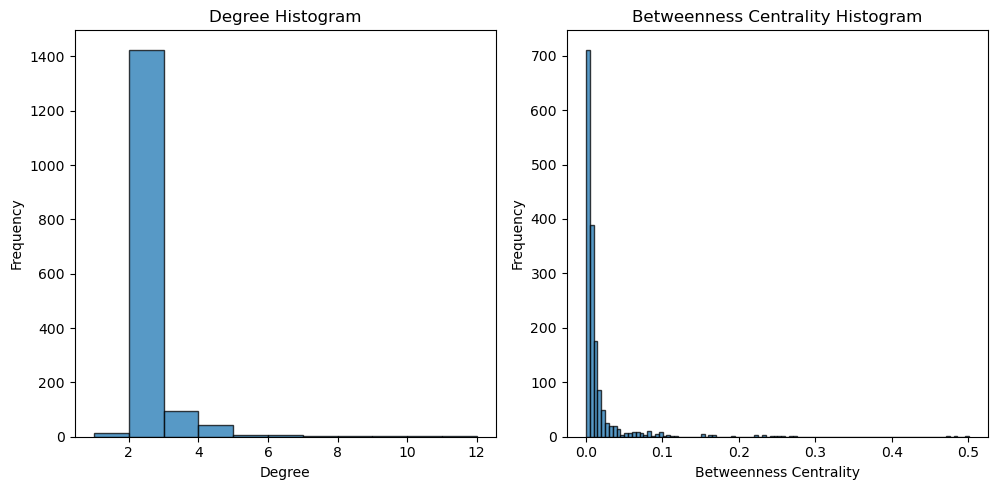

In [21]:
# 简单图 连通性
# 设置图形大小
plt.figure(figsize=(15, 5))

# 绘制度数直方图
plt.subplot(131)
plt.hist(degrees.values(), bins=range(1, max(degrees.values())+2), alpha=0.75, edgecolor='black')
plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')

# 绘制介数中心性直方图
plt.subplot(132)
plt.hist(nx.betweenness_centrality(G).values(), bins=100, alpha=0.75, edgecolor='black')
plt.title('Betweenness Centrality Histogram')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# # 绘制聚集系数直方图
# plt.subplot(133)
# plt.hist(clustering_coeffs.values(), bins=20, alpha=0.75, edgecolor='black')
# plt.title('Clustering Coefficient Histogram')
# plt.xlabel('Clustering Coefficient')
# plt.ylabel('Frequency')

# 显示图形
plt.tight_layout()
plt.show()

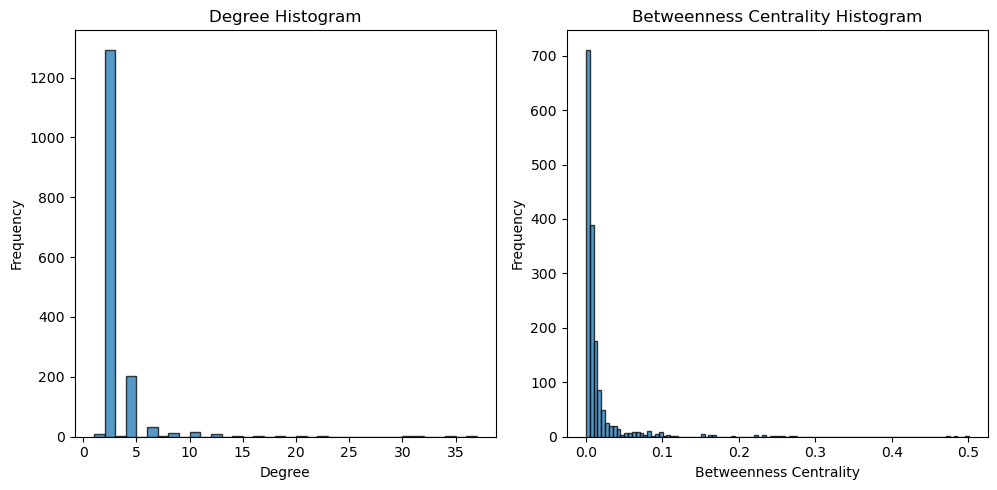

In [22]:
#Multi 图 鲁棒性
# 设置图形大小
plt.figure(figsize=(15, 5))

# 绘制度数直方图
plt.subplot(131)
plt.hist(dict(G.degree()).values(), bins=range(1, max(dict(G.degree()).values())+2), alpha=0.75, edgecolor='black')
plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')

# 绘制介数中心性直方图
plt.subplot(132)
plt.hist(betweenness_centrality.values(), bins=100, alpha=0.75, edgecolor='black')
plt.title('Betweenness Centrality Histogram')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# # 绘制聚集系数直方图
# plt.subplot(133)
# plt.hist(clustering_coeffs.values(), bins=20, alpha=0.75, edgecolor='black')
# plt.title('Clustering Coefficient Histogram')
# plt.xlabel('Clustering Coefficient')
# plt.ylabel('Frequency')

# 显示图形
plt.tight_layout()
plt.show()

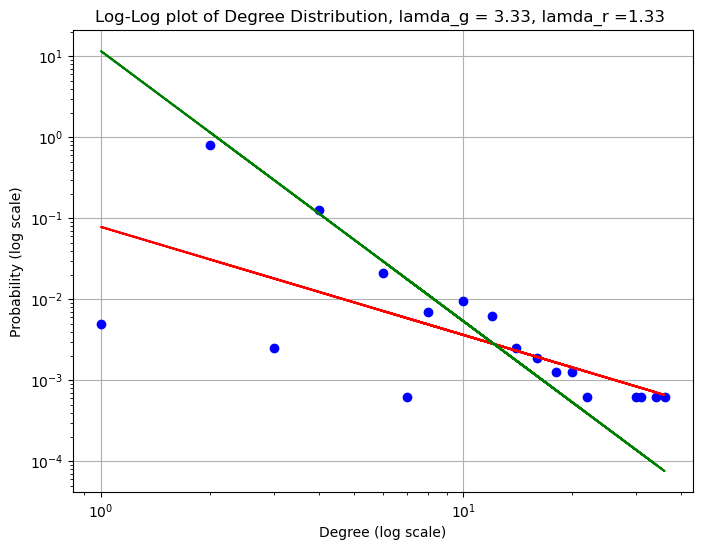

In [23]:
# 获取度数
degrees_log = [G.degree(n) for n in G.nodes()]

# 计算每个度数的频率
degree_count = {}
for degree in degrees_log:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

# 转换为概率 (频率除以总节点数)
total_nodes = float(G.number_of_nodes())
degree_probability = {k: v / total_nodes for k, v in degree_count.items()}


# 准备绘制数据
degrees_prob = list(degree_probability.keys())
probabilities = list(degree_probability.values())

# 假设 degrees 和 probabilities 是从前面步骤得到的数据
log_degrees = np.log(degrees_prob)
log_probabilities = np.log(probabilities)

# 使用 polyfit 进行线性拟合，得到斜率和截距
slope, intercept = np.polyfit(log_degrees, log_probabilities, 1)

# 使用拟合参数生成模型数据
fit_line_manual = np.exp(intercept+5) * np.power(degrees_prob, slope+-2)
fit_line = np.exp(intercept) * np.power(degrees_prob, slope)

# 绘制对数对数图
plt.figure(figsize=(8, 6))
plt.loglog(degrees_prob, probabilities, 'bo')  # 'bo' 表示蓝色圆点
plt.loglog(degrees_prob, fit_line, 'r-', label=f'Fit Line: y = {np.exp(intercept):.2f}x^{slope:.2f}')
plt.loglog(degrees_prob, fit_line_manual, 'g-', label=f'Fit Line: y = {np.exp(intercept):.2f}x^{slope:.2f}')

plt.title('Log-Log plot of Degree Distribution, lamda_g = 3.33, lamda_r ={0:.2f} '.format(-slope))
plt.xlabel('Degree (log scale)')
plt.ylabel('Probability (log scale)')
plt.grid(True)
plt.show()


In [24]:
# 最大介数, 最大度数, 随机摧毁. 
# 分别基于 简单图, 和考虑多重连接性的图.
# 1, 摧毁节点(不需要简单图)(不需要介数,), 2, 摧毁连接()
# 完成的: 节点摧毁: 随机, 简单图最大节点, 多重图最大节点, 最大介数(简单多重一致)
#        边摧毁: 随机(考虑多重性), 简单图最大介数边, 复杂图最大介数边

In [25]:
# 随机节点删除 简单网路
def remove_random_node(G_multi, G_simple):
    # # copy
    # copy_G = G.copy()
    # 确保图不是空的
    if len(G_simple) == 0:
        raise ValueError("The graph is empty")
    
    # 随机选择一个节点
    node_to_remove = random.choice(list(G_simple.nodes()))
    
    # 删除该节点及其相连的边
    G_simple.remove_node(node_to_remove)
    
    return G_simple, node_to_remove, "YAN"

# 删除节点度数最大的
def remove_highest_degree_node_simple(G_multi, G_simple):
    if G_simple.number_of_nodes() == 0:
        raise ValueError("The graph is empty")

    # 计算每个节点的度数并找到度数最高的节点
    node_to_remove = max(G_simple.degree, key=lambda x: x[1])[0]

    # 删除节点
    G_simple.remove_node(node_to_remove)
    
    return G_simple, node_to_remove, "YAN"

# 删除多重图中度数最大的在简单图中
def remove_highest_degree_node_multi(G_multi, G_simple):
    if G_multi.number_of_nodes() == 0:
        raise ValueError("The MultiGraph is empty")
    if G_simple.number_of_nodes() == 0:
        raise ValueError("The Simple Graph is empty")

    # 在多重图中计算每个节点的总度数（包括重边）
    node_to_remove = max(G_multi.degree, key=lambda x: x[1])[0]

    # 如果简单图中存在该节点，则删除
    if G_simple.has_node(node_to_remove):
        G_simple.remove_node(node_to_remove)
        G_multi.remove_node(node_to_remove)
    else:
        raise ValueError(f"The node {node_to_remove} found in MultiGraph is not present in the Simple Graph")
    
    return G_multi, G_simple, node_to_remove

# 计算简单图中每个节点的介数中心性，并删除介数中心性最高的节点
def remove_highest_betweenness_node_simple(G_multi, G_simple):
    if G_simple.number_of_nodes() == 0:
        raise ValueError("The graph is empty")

    # 计算每个节点的介数中心性并找到介数最高的节点
    node_betweenness = nx.betweenness_centrality(G_simple)
    node_to_remove = max(node_betweenness, key=node_betweenness.get)

    # 删除该节点
    G_simple.remove_node(node_to_remove)
    
    return G_simple, node_to_remove, "YAN"

In [26]:
# 多重性 随机删除边
def remove_random_edge_multi(G_multi, G_simple):
    if G_multi.number_of_edges() == 0:
        raise ValueError("The MultiGraph has no edges to remove")
    if G_simple.number_of_edges() == 0:
        raise ValueError("The Simple Graph has no edges")

    # 随机选择一条边来删除
    edge_to_remove = random.choice(list(G_multi.edges()))
    G_multi.remove_edge(*edge_to_remove)

    # 检查在多重图中是否还有连接这两个节点的其他边
    if G_multi.number_of_edges(edge_to_remove[0], edge_to_remove[1]) == 0:
        # 如果没有其他边，则在简单图中删除这条边
        if G_simple.has_edge(*edge_to_remove):
            G_simple.remove_edge(*edge_to_remove)

    return G_multi, G_simple, edge_to_remove

# 多重性 删除介数最大边
def remove_edge_by_betweenness_multi(G_multi, G_simple):
    if G_simple.number_of_edges() == 0:
        raise ValueError("The Simple Graph has no edges")
    if G_multi.number_of_edges() == 0:
        raise ValueError("The MultiGraph has no edges")
    
    # 计算简单图的边介数中心性
    edge_betweenness = nx.edge_betweenness_centrality(G_simple, normalized=True)
    
    # 找到介数中心性最高的边
    edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
    
    # 在多重图中删除这条边
    G_multi.remove_edge(*edge_to_remove)
    
    # 检查在多重图中是否还有连接这两个节点的其他边
    if G_multi.number_of_edges(*edge_to_remove) == 0:
        # 如果没有其他边，则在简单图中删除这条边
        if G_simple.has_edge(*edge_to_remove):
            G_simple.remove_edge(*edge_to_remove)

    return G_multi, G_simple, edge_to_remove

# 简单图 删除介数最大边
def remove_edge_by_betweenness_simple(G_multi, G_simple):
    if G_simple.number_of_edges() == 0:
        raise ValueError("The Simple Graph has no edges")

    
    # 计算简单图的边介数中心性
    edge_betweenness = nx.edge_betweenness_centrality(G_simple, normalized=True)
    
    # 找到介数中心性最高的边
    edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
    
    # 删除简单图的这个便
    G_simple.remove_edge(*edge_to_remove)

    return G_simple, edge_to_remove, "YAN"

In [27]:
# 度量指数:================================================================
def global_efficiency(G):
    n = len(G.nodes())  # 节点总数
    if n < 2:
        return 0  # 少于两个节点，全局效率为0
    
    path_length_dict = dict(nx.all_pairs_shortest_path_length(G))  # 计算所有节点对的最短路径长度
    total_distance_inv = 0  # 倒数距离总和
    
    for distances in path_length_dict.values():
        for length in distances.values():
            if length > 0:  # 跳过长度为0（节点到自身的距离）
                total_distance_inv += 1 / length
    
    # 计算全局效率：总倒数距离除以可能的节点对数（不包括自身，即N(N-1)）
    return total_distance_inv / (n * (n - 1))

def largest_component_size(G):
    # 使用nx.connected_components找到所有连通分量
    components = nx.connected_components(G)
    # 找到节点数最多的连通分量
    largest_component = max(components, key=len)  # key=len使得max函数基于连通分量的大小选择最大的一个
    # 返回最大连通分量的节点数
    return len(largest_component)



In [40]:
def iterative_damage(G_multi, G_simple, damage_function, iterations, file_name = None):
    # 创建一个副本，以防修改原始图
    G_m = G_multi.copy()
    G_si = G_simple.copy()
    max_node = len(G_si.nodes())
    # 存储结果的字典
    results = {
        'largest_component_ratio': [],
        'global_efficiency': [],
        'num_degree':[],
        'num_si_edge':[],
        'num_m_edge':[]
    }
    largest_size = largest_component_size(G_si)
    results['largest_component_ratio'].append(largest_size / max_node)
    
    # 计算全局效率
    efficiency = global_efficiency(G_si)
    results['global_efficiency'].append(efficiency)
    
    results['num_degree'].append(len(G_si.nodes()))
    results['num_si_edge'].append(len(G_si.edges()))
    results['num_m_edge'].append(len(G_m.edges()))

    for i in range(iterations):
        print('iteration', i)
        # 应用损毁函数
        op_1, op_2, op_3 = damage_function(G_m,G_si)
        if op_3 == "YAN":
            # 只有simple 1是simple 网络 2是删除的东西
            G_si = op_1
            print("简单图")
            print(op_2)
        else:
            G_m = op_1
            G_si = op_2
            print("多重图")
            print(op_3)
            
        num_si_node = len(G_si.nodes())
        num_si_edge = len(G_si.edges())
        num_m_edge = len(G_m.edges())
        
        print('简单图剩余节点: ', num_si_node)
        print("简单图剩余边: ", num_si_edge)
        print("复杂图剩余边: ", num_m_edge)

        results['num_degree'].append(num_si_node)
        results['num_si_edge'].append(num_si_edge)
        results['num_m_edge'].append(num_m_edge)
        
        # 计算最大连通分量的大小
        largest_size = largest_component_size(G_si)
        results['largest_component_ratio'].append(largest_size / max_node)
        
        # 计算全局效率
        efficiency = global_efficiency(G_si)
        results['global_efficiency'].append(efficiency)
        
        # 如果图已经没有边或节点，停止迭代
        if G_si.number_of_nodes() == 0 or G_si.number_of_edges() == 0:
            print("没有可删的了")
            print(G_si.nodes())
            break
        
        if file_name is not None:
            with open(file_name,'wb') as f:
                pickle.dump(results, f)
    
    return results

In [53]:

iterative_damage(G,G_simple,remove_random_edge_multi,2500, file_name='remove_random_edge_multi_2')
iterative_damage(G,G_simple,remove_random_edge_multi,2500, file_name='remove_random_edge_multi_3')

iteration 0
多重图
('Namatjira Dr After Hindmarsh Dr', 'St John Vianney Namatjira Dr')
简单图剩余节点:  1594
简单图剩余边:  1720
复杂图剩余边:  2157
iteration 1
多重图
('Louisa Lawson Cr After 2nd Willoughby Cr', 'Louisa Lawson Cr After Fenston Pl')
简单图剩余节点:  1594
简单图剩余边:  1719
复杂图剩余边:  2156
iteration 2
多重图
('Canberra College Launceston St', 'St Peter & St Pauls Ps Yamba Dr')
简单图剩余节点:  1594
简单图剩余边:  1719
复杂图剩余边:  2155
iteration 3
多重图
('Louisa Lawson Cr Before Litchfield Pl', 'Louisa Lawson Cr Before 2nd Willoughby Cr')
简单图剩余节点:  1594
简单图剩余边:  1718
复杂图剩余边:  2154
iteration 4
多重图
('Kitchener St After Ainsworth St', 'Canberra Hospital Yamba Dr')
简单图剩余节点:  1594
简单图剩余边:  1718
复杂图剩余边:  2153
iteration 5
多重图
('Baldwin Dr After 2nd Maribyrnong Av', 'Baldwin Dr Before Ginninderra Dr')
简单图剩余节点:  1594
简单图剩余边:  1718
复杂图剩余边:  2152
iteration 6
多重图
('Tuggeranong Interchange', 'Lakeside Leisure Centre Anketell St')
简单图剩余节点:  1594
简单图剩余边:  1718
复杂图剩余边:  2151
iteration 7
多重图
('Blamey Cr Before Edmondson St', 'White St Opp Campbel

{'largest_component_ratio': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.998745294855709,
  0.998745294855709,
  0.998745294855709,
  0.998745294855709,
  0.998745294855709,
  0.993099121706399,
  0.993099121706399,
  0.993099121706399,
  0.993099121706399,
  0.993099121706399,
  0.9924717691342535,
  0.9924717691342535,
  0.9912170639899623,
  0.9912170639899623,
  0.9912170639899623,
  0.9912170639899623,
  0.9905897114178168,
  0.9905897114178168,
  0.9905897114178168,
  0.9905897114178168,
  0.9905897114178168,
  0.9905897114178168,
  0.9905897114178168,
  0.9905897114178168,
  0.9905897114178168,
  0.9905897114178168,
  0.9893350062735258,
  0.9893350062735258,
  0.9893350062735258,
  0.9887076537013801,
  0.9887076537013801,
  0.9805520702634881,
  0.9805520702634881,
  0.9805520702634881,
  0.9711417816813049,
  0.9711417816813049,
  0.9711417816813049,
  0.97114178168

In [39]:
G_test = nx.Graph()
# # 第一个分量
# G_test.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A')])
# # 第二个分量，较大的一个
# G_test.add_edges_from([('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'D'), ('D', 'F')])

G_test.add_edges_from([('A', 'B')])
G_test.remove_edge('A','B')
G_test_m = G_test.copy()
G_test_m.add_edge('A','B')

dict(nx.all_pairs_shortest_path_length(G_test))

{'A': {'A': 0}, 'B': {'B': 0}}

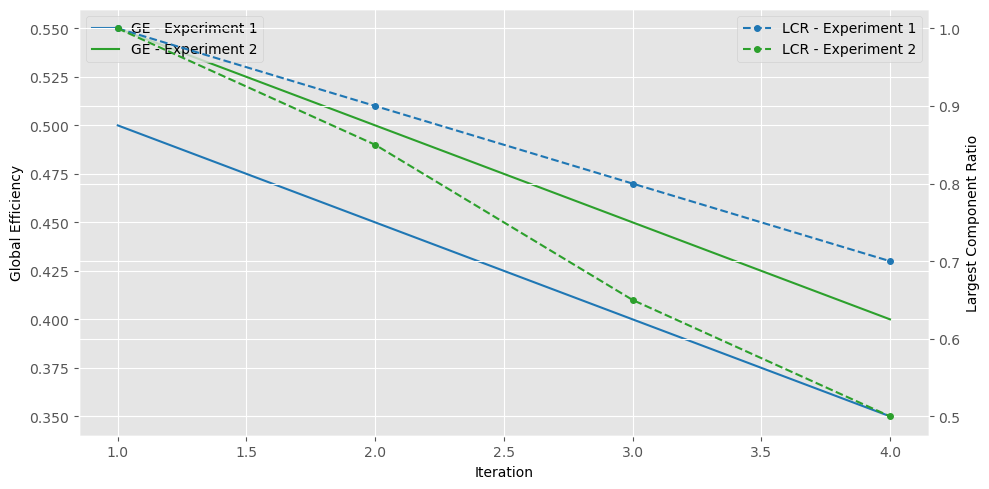

In [43]:
def visualize_results(result_dicts, labels):
    plt.style.use('ggplot')
    
    # 确保labels的长度与result_dicts一致
    assert len(result_dicts) == len(labels), "Labels list must match the length of result_dicts list."
    
    # 定义每个实验的颜色和线型
    colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange']
    line_styles = ['-', '--']  # 一个用于全局效率，一个用于最大连通分量比例
    
    # 创建图表和坐标轴
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    # 配置第一个y轴（全局效率）
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Global Efficiency')
    ax1.tick_params(axis='y')
    
    # 配置第二个y轴（最大连通分量比例）
    ax2 = ax1.twinx()
    ax2.set_ylabel('Largest Component Ratio')
    ax2.tick_params(axis='y')
    
    # 绘制每个实验的数据
    for idx, (result_dict, label) in enumerate(zip(result_dicts, labels)):
        iterations = list(range(1, len(result_dict['global_efficiency']) + 1))
        # 绘制全局效率
        ax1.plot(iterations, result_dict['global_efficiency'], line_styles[0], label=f'GE - {label}', color=colors[idx % len(colors)])
        # 绘制最大连通分量比例
        ax2.plot(iterations, result_dict['largest_component_ratio'], line_styles[1], label=f'LCR - {label}', color=colors[idx % len(colors)], marker='o', markersize=4)
    
    # 添加图例
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    fig.tight_layout()  # 调整布局以防止重叠
    plt.show()

# 使用示例
results1 = {
    'largest_component_ratio': [1, 0.9, 0.8, 0.7],
    'global_efficiency': [0.5, 0.45, 0.4, 0.35],
    'num_degree': [50, 45, 40, 35],
    'num_si_edge': [100, 90, 80, 70],
    'num_m_edge': [150, 140, 130, 120]
}

results2 = {
    'largest_component_ratio': [1, 0.85, 0.65, 0.5],
    'global_efficiency': [0.55, 0.5, 0.45, 0.4],
    'num_degree': [55, 50, 45, 40],
    'num_si_edge': [110, 100, 90, 80],
    'num_m_edge': [160, 150, 140, 130]
}

# 可视化函数调用
visualize_results([results1, results2], ['Experiment 1', 'Experiment 2'])

In [48]:
def load_results_form_pickel(file_name):
    with open(file_name, 'rb') as file:
        data_loaded = pickle.load(file)
    return data_loaded